In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import load

2025-03-21 16:23:33.146 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 16:23:35.442 
  command:

    streamlit run c:\Users\ronny somi\Documents\salary_prediction_model\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-21 16:23:35.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
salary_df =pd.read_csv('salary_prediction_data.csv')
salary_df.head().

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [52]:
salary1=salary_df['Salary'][:5].round(2)
salary1

0     84620.05
1    142591.26
2     97800.26
3     96834.67
4    132157.79
Name: Salary, dtype: float64

(950, 7)

In [ ]:
salary_df.shape

(950, 8)

In [5]:
# info() to get metadata summary

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [72]:
salary_df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary', 'YearsUntilRetirement'],
      dtype='object')

In [6]:
salary_df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


***check for null values***

### Data Preparation

In [7]:
salary_df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [8]:
salary_df.notna()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True


In [9]:
# check for duplicates

salary_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Perform Exparatory Data Analysis

**Perform unvariate analysis btwn numeric attribute**
* Look at how data is distributed

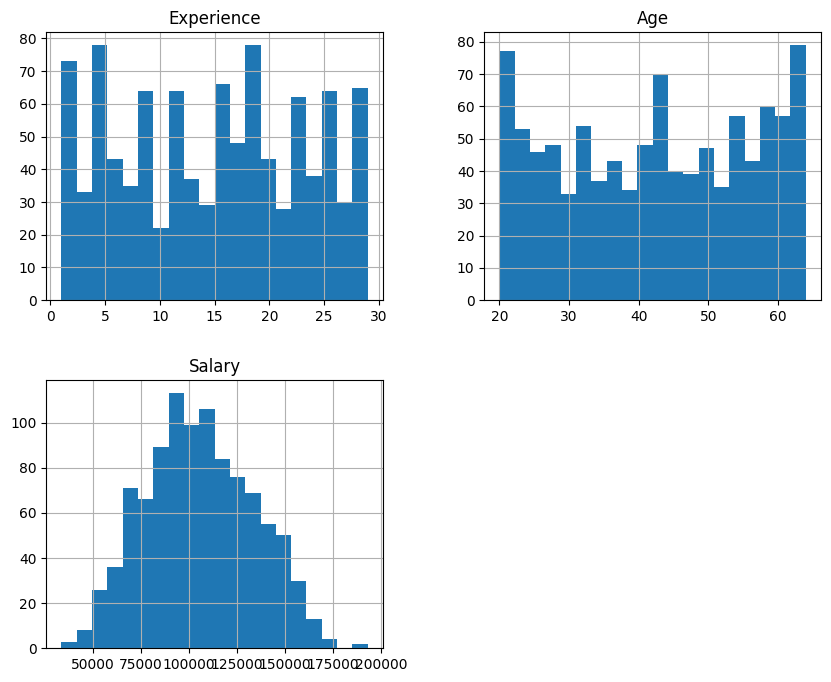

In [10]:
#fig, ax = plt.subplots(figsize=(10, 8))
salary_df.hist(bins = 20, figsize=(10, 8))
plt.show()

C:\Users\ronny somi\AppData\Local\Temp\ipykernel_19452\150612339.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([salary_df['Age'], salary_df['Experience'], salary_df['Salary']], labels=['Age', 'Experience', 'Salary'])


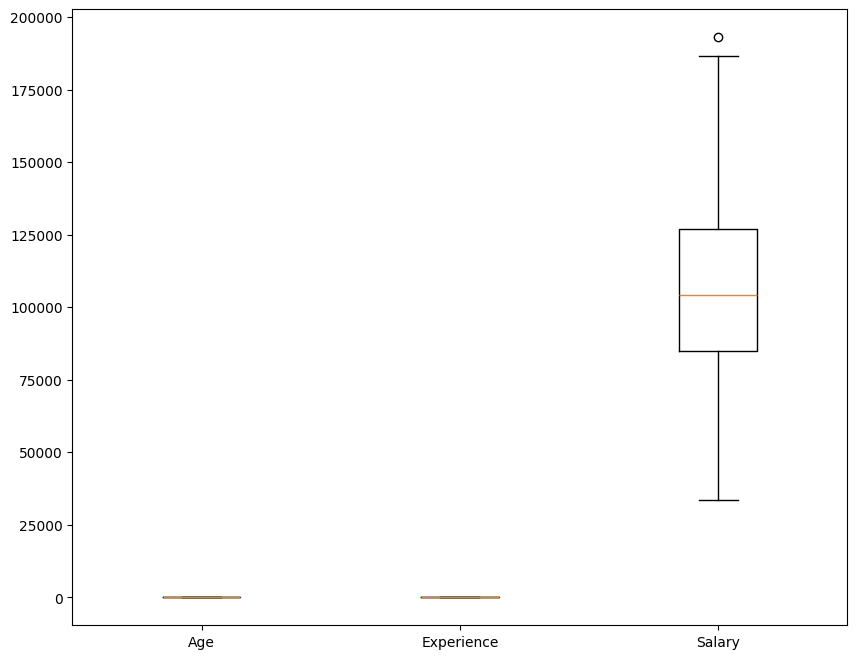

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

# Matplotlib requires data in list format
ax.boxplot([salary_df['Age'], salary_df['Experience'], salary_df['Salary']], labels=['Age', 'Experience', 'Salary'])

plt.show()


In [12]:
# Removing outliers beyond a threshold
salary_df = salary_df[salary_df['Salary'] < salary_df['Salary'].quantile(0.95)]
salary_df.shape


(950, 7)

**Perform unvariate analysis btwn categorical attribute**

In [13]:
salary_df['Gender'].value_counts()

Gender
Male      490
Female    460
Name: count, dtype: int64

In [14]:
salary_df['Job_Title'].value_counts()

Job_Title
Analyst     255
Director    245
Engineer    227
Manager     223
Name: count, dtype: int64

* Why most people are Analyst?

C:\Users\ronny somi\AppData\Local\Temp\ipykernel_19452\567308556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x =salary_df['Job_Title'], y=salary_df['Experience'], palette='coolwarm')


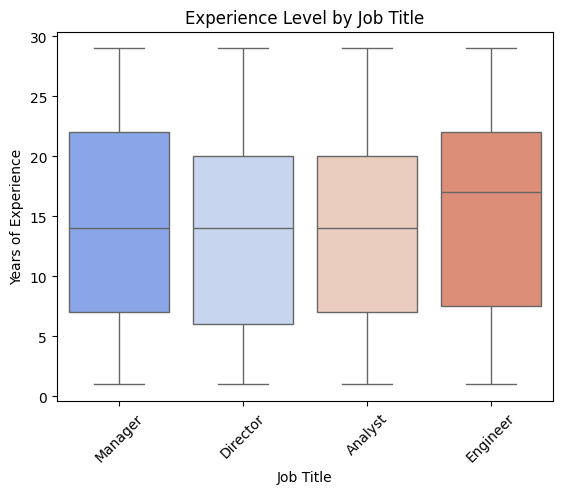

In [15]:
# find why most pple are analyst

fig, ax = plt.subplots()
sns.boxplot(x =salary_df['Job_Title'], y=salary_df['Experience'], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Job Title")
plt.ylabel("Years of Experience")
plt.title("Experience Level by Job Title")

plt.show()

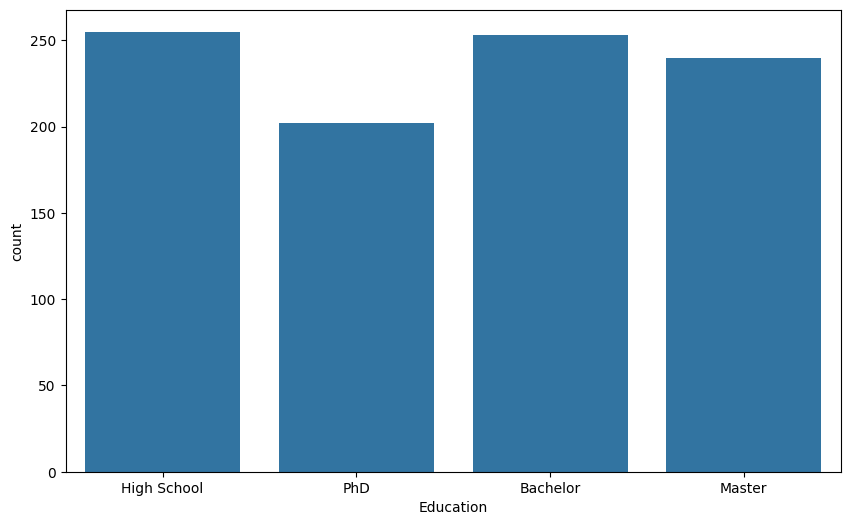

In [16]:
# countplot is used to visualize the count(frequency) of categorical data

plt.figure(figsize=(10,6))
sns.countplot(data=salary_df, x='Education')
plt.show()

**Bivariate Analysis**
* Analyze relationships between features and the target variable (Salary)

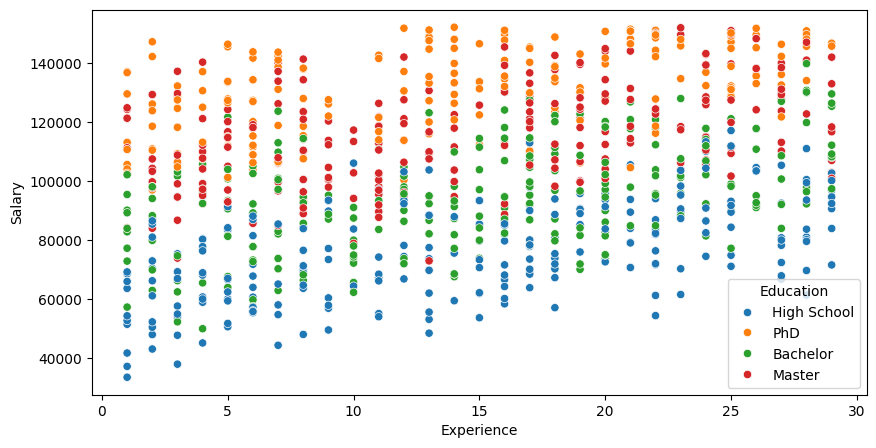

In [17]:
# Numerical vs salary

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=salary_df, x='Experience', y='Salary', hue='Education')
plt.show()

**Perform correlation**

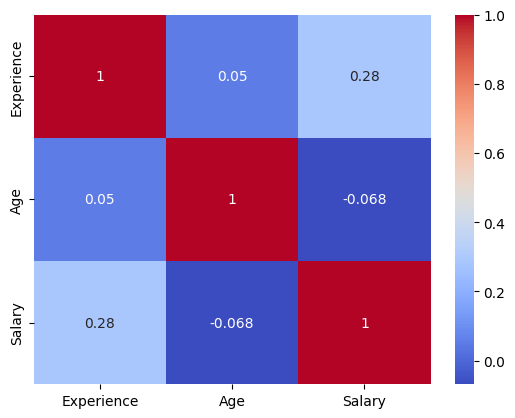

,Experience,Age,Salary
Experience,1.000000,0.049666,0.284807
Age,0.049666,1.000000,-0.068123
Salary,0.284807,-0.068123,1.000000


In [18]:
numeric_values =salary_df.select_dtypes(include=[float, int])

correlation = numeric_values.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
correlation

* Categorical values vs salary

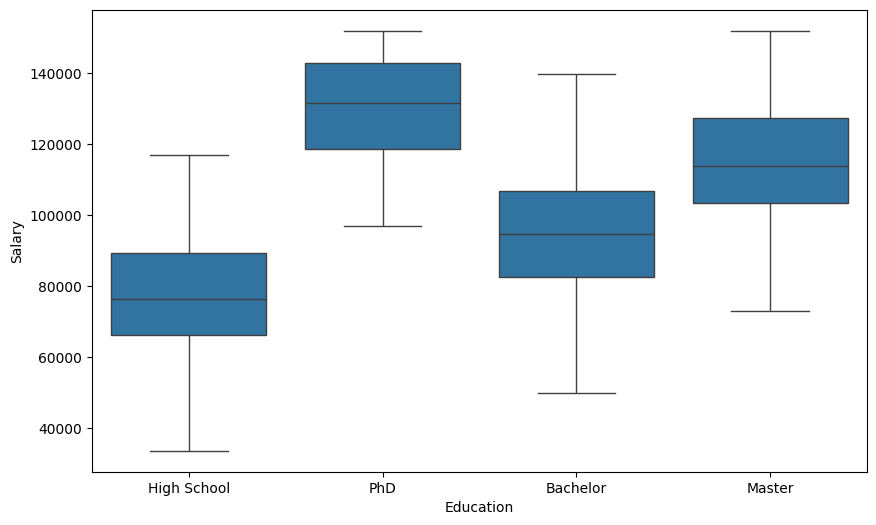

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, x='Education', y='Salary')
plt.show()

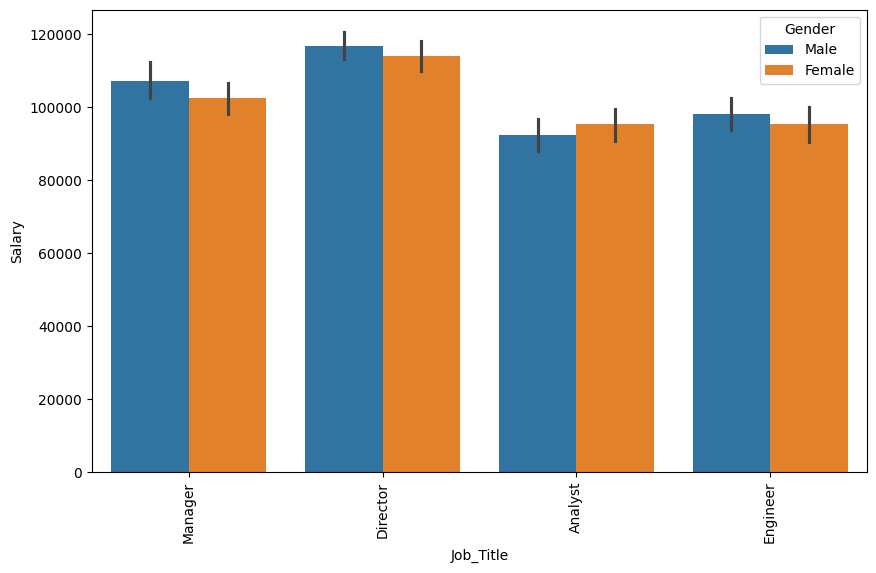

In [20]:
# Grouped bar plots
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_df, x='Job_Title', y='Salary', hue='Gender')
plt.xticks(rotation=90)
plt.show()

* multivariate Analysis

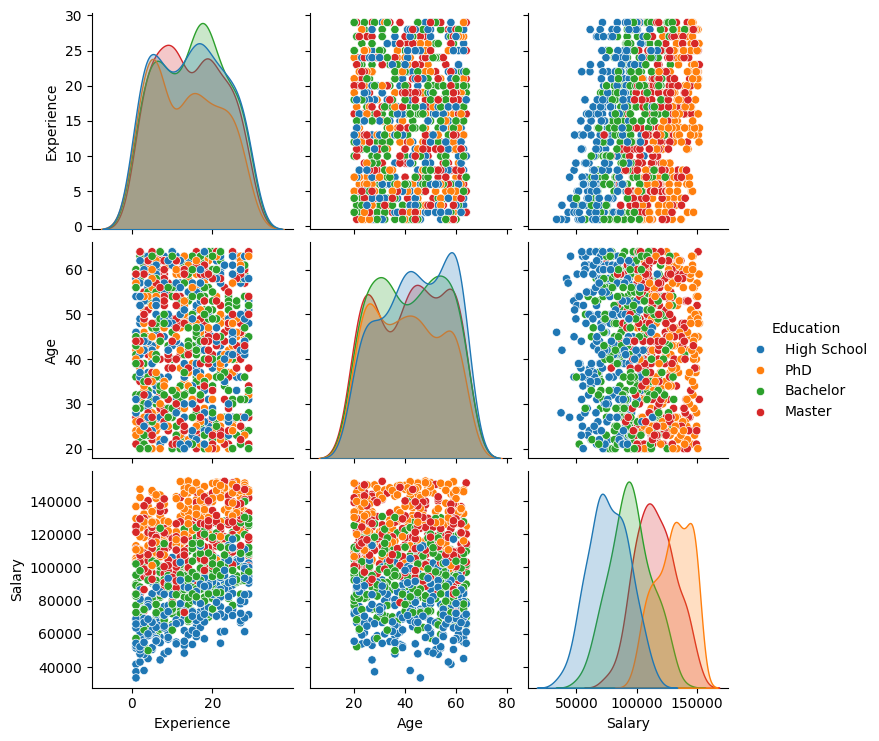

In [21]:
# Analyze interactions between multiple features
sns.pairplot(salary_df, hue='Education')
plt.show()



## **Hypothesis**

* Job Title has a significant impact on salary:

Certain roles (e.g., managers, engineers) may have higher salaries regardless of education or experience.

Action: Group by Job Title and compare average salaries.

* Gender pay gap exists:

Even with similar education and experience, one gender might earn more than the other.

Action: Compare average salaries by gender, controlling for education and experience.

* Experience matters more in certain job roles:

For example, in technical roles, experience might have a stronger impact on salary than in administrative roles.

Action: Analyze the correlation between Years of Experience and Salary for each job title.

* Higher education leads to faster salary growth:

People with advanced degrees might see their salaries increase more rapidly with experience.

Action: Plot Salary vs. Years of Experience for each education level.

* Outliers in salary are concentrated in specific job titles:

Some roles might have extremely high or low salaries compared to the rest.

Action: Use boxplots to analyze salary distribution by job title.

* Age and experience are highly correlated:

Older individuals might have more experience, but this isn’t always the case.

Action: Check the correlation between Age and Years of Experience.

* Part-time vs. full-time work affects salary:

If the dataset includes employment type, part-time workers might earn less than full-time workers.

Action: Compare salaries by employment type (if available).


## **Feature Engineering**

### Attribute Combination
* combine Age & Experience to get year of Retirement

In [22]:
# YearOfretirement

salary_df['YearsUntilRetirement'] = 65 - salary_df['Age'] - salary_df['Experience']

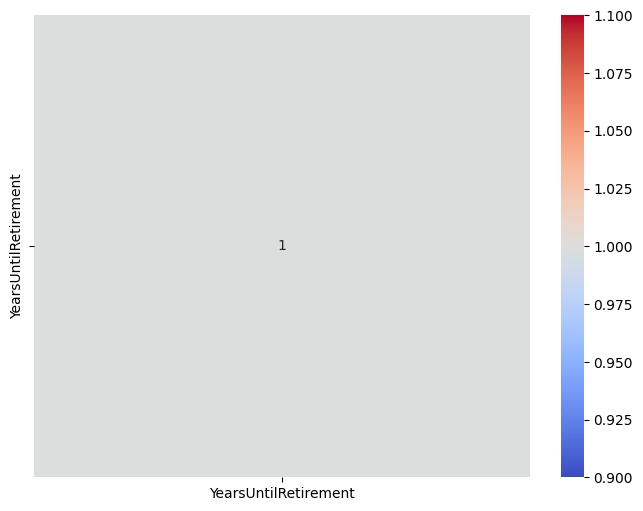

In [23]:
new_feature = ['YearsUntilRetirement']
correlation2 = salary_df[new_feature].corr()

# use heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation2, annot=True, cmap='coolwarm')
plt.show()



* **Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

all_numeric_values = salary_df.select_dtypes(include=[np.number])
scaler_values = scaler.fit_transform(all_numeric_values)
scaler_values

array([[-0.76902017,  1.52444838, -0.69803799, -0.88077404],
       [-0.40663467,  1.22928361,  1.54626055, -0.81914969],
       [ 1.64688315,  1.376866  , -0.18777934, -1.99001222],
       ...,
       [ 0.43893149,  0.12241571, -0.17203161, -0.32615495],
       [ 1.52608798, -0.83686981,  0.22818997, -0.07965757],
       [ 1.28449765, -0.09895787, -1.2223441 , -0.57265232]],
      shape=(950, 4))

* impute empty values for both numeric & categorical

In [25]:
from sklearn.impute import SimpleImputer

# create simpleimputer instance

imputer = SimpleImputer(strategy='median')

# fit the imputer to the salary_data
imputer.fit(all_numeric_values)

#imputer calculates the median of each column and stores it in the statistics_ attribute
imputer.statistics_
all_numeric_values.median().values

array([1.45000000e+01, 4.30000000e+01, 1.02700031e+05, 7.00000000e+00])

In [26]:
print('hello')

hello


In [27]:
# use the trained imputer to transform the data

x = imputer.transform(all_numeric_values)

* Perform feature encording for categorical attribute

In [28]:
# Encode categorical features as ML works with numeric values

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

cat_attribute = salary_df.select_dtypes(include=['object']).columns

cat_hot_encode = encoder.fit_transform(salary_df[cat_attribute])

cat_hot_encode



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 13)>

In [29]:
# convert the sparse matrix to a dense array
cat_hot_encode.toarray()


array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]], shape=(950, 13))

In [30]:
# Get the list of categories
encoder.categories_

[array(['Bachelor', 'High School', 'Master', 'PhD'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Analyst', 'Director', 'Engineer', 'Manager'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

# **Create pipeline**

In [31]:
# create a numpipeline

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

compute_pipeline_num = num_pipeline.fit_transform(all_numeric_values)
compute_pipeline_num


array([[-0.76902017,  1.52444838, -0.69803799, -0.88077404],
       [-0.40663467,  1.22928361,  1.54626055, -0.81914969],
       [ 1.64688315,  1.376866  , -0.18777934, -1.99001222],
       ...,
       [ 0.43893149,  0.12241571, -0.17203161, -0.32615495],
       [ 1.52608798, -0.83686981,  0.22818997, -0.07965757],
       [ 1.28449765, -0.09895787, -1.2223441 , -0.57265232]],
      shape=(950, 4))

In [32]:
# create cat_pipeline

from sklearn.pipeline import make_pipeline

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

compute_pipeline_cat =cat_pipeline.fit_transform(salary_df[cat_attribute])
compute_pipeline_cat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 13)>

* So far, we have handled the categorical columns and the numerical columns
separately. It would be more convenient to have a single transformer capable of
handling all columns, applying the appropriate transformations to each column.
* For this, you can use a ColumnTransformer. For example, the following
ColumnTransformer will apply num_pipeline (the one we just
defined) to the numerical attributes, and cat_pipeline to the categorical
attribute:

In [ ]:
# import the ColumnTransformer

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number)),
                                        (cat_pipeline, make_column_selector(dtype_include=np.object_)),)

drop_target_value = salary_df.drop(['Salary'], axis=1)

prepared_data = preprocessing.fit_transform(drop_target_value)




In [44]:
# get the columns name

preprocessing.get_feature_names_out()

array(['pipeline-1__Experience', 'pipeline-1__Age',
       'pipeline-1__YearsUntilRetirement',
       'pipeline-2__Education_Bachelor',
       'pipeline-2__Education_High School',
       'pipeline-2__Education_Master', 'pipeline-2__Education_PhD',
       'pipeline-2__Location_Rural', 'pipeline-2__Location_Suburban',
       'pipeline-2__Location_Urban', 'pipeline-2__Job_Title_Analyst',
       'pipeline-2__Job_Title_Director', 'pipeline-2__Job_Title_Engineer',
       'pipeline-2__Job_Title_Manager', 'pipeline-2__Gender_Female',
       'pipeline-2__Gender_Male'], dtype=object)

### Now I have a working pipeline next step is to train model

### **Select and train model**

In [49]:
# split data for training and testing

from sklearn.model_selection import train_test_split

x = prepared_data

y = salary_df['Salary']

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

model =lin_reg.fit(x_train, y_train)

In [51]:
salary_prediction = lin_reg.predict(x_test)
salary_prediction[:5].round(2)

array([127882.97,  76941.07, 105539.1 ,  90116.17,  70307.01])

In [53]:
# find the error

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(salary_prediction, y_test)
lin_rmse

99186332.25623731

#### Try a different model RandomTreeRegressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [61]:
# predict the values

algor_tree = tree_reg.predict(x_test)
list(algor_tree[:5].round(2))

[np.float64(113064.55),
 np.float64(92294.09),
 np.float64(102126.87),
 np.float64(94046.21),
 np.float64(79183.54)]

In [70]:
# find the error
error_tree = mean_squared_error(algor_tree, y_test)
error_tree

212923658.46920577

In [68]:
# try to use K-fold cross-validation feature to find error

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
tree_rmses[:5].round(2)

array([12929.26, 13724.62, 12584.92, 14627.14, 17921.36])

### **Save the trained model**

In [71]:
import joblib

joblib.dump(tree_reg, 'Salary_prediction_model.pkl' )

['Salary_prediction_model.pkl']

* Test the model using RandomForestRegressor arigorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

# not completed yet


## **Fine Tuning my model**